First, import standard libraries:

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

The following dictionary reflects the actual game deck. Each key-value pair is one card, where the key is the index and the value is a list containing the names of the symbols on that card.

In [2]:
deck = {
    0:['tet','dragon','guava','fan','xe om','bip beep!','conical hat','incense bowl'],
    1:['chi pheo','dragon fruit','dragon','turtle','nem','red envelope','mangosteen','thuoc lao'],
    2:['cyclo','bun cha','dragon','bluedragon','blue stool','tre trau','bum gun','water buffalo'],
    3:['pho','cyclo','bip beep!','construction','mangosteen','bus','police','tran quoc pagoda'],
    4:['nem','train','incense bowl','construction','bia hoi','rice','bum gun','lead ninja'],
    5:['trung cake','oi gioi oi','iced coffee','bip beep!','cub bike','thuoc lao','lead ninja','bluedragon'],
    6:['xe om','construction','mot, hai, ba, dzo','red envelope','water buffalo','iced coffee','flip flop','mausoleum'],
    7:['water puppet','hammock','oi gioi oi','rice','cyclo','peach blossom','red envelope','fan'],
    8:['guava','hammock','fish sauce','mangosteen','tre trau','lotus','lead ninja','mausoleum'],
    9:['thuoc lao','rice','rice paddy','snake wine','tre trau','police','tet','flip flop'],
    10:['dragon','ao dai','rice','tran quoc pagoda','moon cake','mausoleum','lantern','cub bike'],
    11:['flip flop','dragon fruit','ao dai','conical hat','cyclo','swan boat','lead ninja','cockerel'],
    12:['rice paddy','cockerel','blue stool','moon cake','oi gioi oi','bia hoi','xe om','mangosteen'],
    13:['iced coffee','cockerel','hammock','banh mi','dragon','em oi!','train','police'],
    14:['bun cha','trung cake','dragon fruit','moon cake','hammock','construction','anh yeu em!','tet'],
    15:['iced coffee','dragon fruit','rice paddy','fan','bum gun','tran quoc pagoda','fish sauce','balut'],
    16:['turtle','bip beep!','mot, hai, ba, dzo','bun cha','passion fruit','fish sauce','cockerel','rice'],
    17:['bia hoi','tet','lotus','cathedral','cyclo','turtle','iced coffee','lantern'],
    18:['mot, hai, ba, dzo','blue stool','nem','trung cake','lotus','fan','ao dai','police'],
    19:['conical hat','blue stool','banh mi','water puppet','thuoc lao','construction','lantern','fish sauce'],
    20:['em oi!','bun cha','fan','pho','thuoc lao','swan boat','mausoleum','bia hoi'],
    21:['thuoc lao','guava','balut','chopsticks','mot, hai, ba, dzo','cyclo','train','moon cake'],
    22:['bus','incense bowl','lantern','mot, hai, ba, dzo','dragon fruit','tre trau','em oi!','oi gioi oi'],
    23:['conical hat','passion fruit','pho','nem','tre trau','peach blossom','iced coffee','moon cake'],
    24:['ao dai','bus','bum gun','xe om','thuoc lao','passion fruit','cathedral','hammock'],
    25:['peach blossom','bun cha','xe om','lead ninja','lantern','balut','police','chi pheo'],
    26:['xe om','em oi!','nem','fish sauce','cyclo','anh yeu em!','cub bike','snake wine'],
    27:['chi pheo','train','ao dai','oi gioi oi','pho','tet','fish sauce','water buffalo'],
    28:['cathedral','nem','bun cha','flip flop','tran quoc pagoda','banh mi','guava','oi gioi oi'],
    29:['train','lotus','bus','conical hat','bun cha','red envelope','rice paddy','cub bike'],
    30:['red envelope','tet','tran quoc pagoda','passion fruit','lead ninja','blue stool','chopsticks','em oi!'],
    31:['tre trau','chopsticks','cockerel','construction','cub bike','cathedral','chi pheo','fan'],
    32:['snake wine','tran quoc pagoda','conical hat','mot, hai, ba, dzo','chi pheo','bluedragon','bia hoi','hammock'],
    33:['iced coffee','water puppet','ao dai','bun cha','chopsticks','incense bowl','mangosteen','snake wine'],
    34:['police','moon cake','red envelope','incense bowl','swan boat','bluedragon','cathedral','fish sauce'],
    35:['hammock','bip beep!','rice paddy','nem','water buffalo','chopsticks','lantern','swan boat'],
    36:['incense bowl','chi pheo','cyclo','rice paddy','mausoleum','passion fruit','trung cake','banh mi'],
    37:['ao dai','construction','rice paddy','peach blossom','guava','bluedragon','em oi!','turtle'],
    38:['bus','turtle','banh mi','fan','moon cake','lead ninja','water buffalo','snake wine'],
    39:['swan boat','anh yeu em!','iced coffee','rice','bus','blue stool','chi pheo','guava'],
    40:['conical hat','mausoleum','oi gioi oi','chopsticks','anh yeu em!','turtle','bum gun','police'],
    41:['bip beep!','red envelope','tre trau','balut','ao dai','banh mi','anh yeu em!','bia hoi'],
    42:['blue stool','cub bike','pho','hammock','turtle','flip flop','incense bowl','balut'],
    43:['trung cake','mangosteen','em oi!','balut','water buffalo','cathedral','rice','conical hat'],
    44:['tet','water puppet','nem','mausoleum','bus','cockerel','bluedragon','balut'],
    45:['swan boat','tran quoc pagoda','tre trau','trung cake','xe om','turtle','train','water puppet'],
    46:['chi pheo','water puppet','bum gun','bip beep!','em oi!','lotus','flip flop','moon cake'],
    47:['anh yeu em!','rice paddy','lead ninja','dragon','mot, hai, ba, dzo','pho','water puppet','cathedral'],
    48:['pho','dragon fruit','bluedragon','chopsticks','rice','lotus','xe om','banh mi'],
    49:['bia hoi','fish sauce','trung cake','bus','peach blossom','chopsticks','dragon','flip flop'],
    50:['cathedral','blue stool','bip beep!','mausoleum','snake wine','peach blossom','dragon fruit','train'],
    51:['passion fruit','cub bike','water buffalo','police','water puppet','bia hoi','guava','dragon fruit'],
    52:['lotus','dragon','snake wine','balut','passion fruit','swan boat','oi gioi oi','construction'],
    53:['lantern','fan','mangosteen','anh yeu em!','bluedragon','train','passion fruit','flip flop'],
    54:['banh mi','mot, hai, ba, dzo','cub bike','mangosteen','peach blossom','bum gun','tet','swan boat'],
    55:['incense bowl','cockerel','thuoc lao','anh yeu em!','water buffalo','peach blossom','lotus','tran quoc pagoda'],
    56:['lantern','cockerel','pho','bum gun','red envelope','guava','trung cake','snake wine'],
}

Let's count up how many times each symbol appears, in total.

In [3]:
symbol_counts = {}

for index, card in deck.items():
    for symbol in card:
        if symbol in symbol_counts.keys():
            symbol_counts[symbol] += 1
        else:
            symbol_counts[symbol] = 1

symbol_counts = pd.DataFrame.from_dict(symbol_counts, orient='index',columns=['count'])
symbol_counts = symbol_counts.reset_index().rename(columns={'index':'symbol'})
symbol_counts.describe()

,count
count,57.0
mean,8.0
std,0.0
min,8.0
25%,8.0
50%,8.0
75%,8.0
max,8.0


Nice and simple. Each of the 57 symbols appears exactly 8 times. The creation of this DataFrame also gives us a handy way to get the list of symbols without having to wade through the deck dictionary again.

But first, I'll create a helper function which tests whether two lists share at least one common element, returning simply `True` or `False`.

In [4]:
def match(target, draw):
    '''Returns True if the two lists share at least one common element'''
    result = False
    for x in target:
        for y in draw:
            if x==y:
                result = True
                return result
    return result

Next, I can transverse the integer range 0 through 56, corresponding to the card indexes, two times. This allows pairwise comparison between every card vs. every other card (including duplicate comparisons of A vs. B and B vs. A). We test each pair with the helper function, and if any pair fails to match, we get a printout of the offending indexes.

In [5]:
for x in range(57):
    for y in range(57):
        target = deck[x]
        draw = deck[y]
        if match(target, draw):
            continue
        else:
            print('Target {} and draw {} are NOT a match!'.format(x, y))

Nothing printed.

Well, originally, a whole bunch of stuff printed, but this was because I'd made a few typos in the original deck dictionary. Thanks for the targeted proofreading, Python!

Once the data-entry errors were resolved, we could confirm that every card does, indeed, match every other card in the deck.

Now, I will set aside the actual game cards and consider the idea of creating new, hypothetical Same Same cards. I will use the same set of 57 symbols (grabbed from the `symbol_counts` DataFrame above), and keep the convention of assigning eight symbols to a card with no replacement.

In [6]:
def play_ss_random(n=1):
    '''Simulate n trials of a hypothetical Same Same matching task with randomly-generated cards'''
    
    # Define list of all 57 possible symbols: The 'symbol' columns of the symbol_counts DataFrame
    symbols = list(symbol_counts.symbol)
    
    # Create list to record the number of draws required to find a match for each trial
    draws_list = []
    
    # Perform n trials
    for trial in range(n):
        
        # Generate random combination of 8 symbols from the available 57
        target = random.sample(symbols, 8)
        
        # Create draw counter
        draws = 0
        
        # Set match state
        is_match = False
        
        # Draw subsequent cards from the deck until a match is found
        while is_match is False:
            draw = random.sample(symbols, 8)
            draws += 1
            if sorted(target) == sorted(draw):
                print('''Holy s#!+, the program generated a drawn card identical to the target card.
                        The chances of that happening are about one in 1.6 billion.
                        This is among the most unlikely things that will ever happen to you.''')
                # Re-draw card to compensate for the incomprehensibly unlikely thing that just happened
                # Don't increase the draw counter again; it's a mulligan
                draw = random.sample(symbols, 8)
            is_match = match(target, draw)
        
        draws_list.append(draws)
    
    return draws_list

With my function created, I will run one million trials. Then, I'll follow a similar protocol to the creation of the `symbol_counts` dictionary, this time resulting in a DataFrame containing the various numbers of draws required to reach a match (`draw_count`), the number of times that draw count occurred across trials (`frequency`), and the frequency presented again as a percentage of the total (`rate(%)`).

In [7]:
ss_random_100_trials = play_ss_random(1000000)

draw_counts = {}

for draw in ss_random_100_trials:
    if draw in draw_counts.keys():
        draw_counts[draw] += 1
    else:
        draw_counts[draw] = 1

draw_counts = pd.DataFrame.from_dict(draw_counts, orient='index')
draw_counts = draw_counts.reset_index().rename(columns={'index':'draw_count',0:'frequency'})
draw_counts = draw_counts.sort_values(by='draw_count')
draw_counts['rate(%)'] = round(draw_counts['frequency'] / draw_counts['frequency'].sum() * 100, 4)
draw_counts

,draw_count,frequency,rate(%)
0,1,727030,72.7030
1,2,198478,19.8478
2,3,54293,5.4293
3,4,14711,1.4711
4,5,3920,0.3920
5,6,1177,0.1177
6,7,287,0.0287
7,8,75,0.0075
8,9,20,0.0020
9,10,6,0.0006


So, we see that our randomly-generated Same Same cards yielded a first-try match roughly 73% of the time, and so on. Here are the percentages visualized in a bar chart:

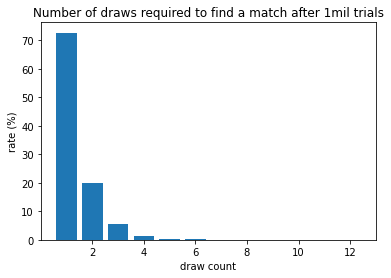

In [17]:
plt.bar(draw_counts['draw_count'], draw_counts['rate(%)'])
plt.title('Number of draws required to find a match after 1mil trials')
plt.xlabel('draw count')
plt.ylabel('rate (%)')
plt.savefig('images/rate_by_draw_count.png', format='png', facecolor='white', dpi=100)
plt.show()